# Project: Wrangling and Analyze Data

**Udacity Data Analyst 4th project**<br>
Hitoshi Kumagai

## Introduction

The dataset what I  wrangled (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates(https://twitter.com/dog_rates), also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc.Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

## Data analysis and visualization

In [3]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import re
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
clean_df = pd.read_csv('twitter_archive_master.csv');

## Stcastics about introduction

In rating numerator, the average value is 13.13  25th percentile is 10 and the 75th percentile is 12.The maximum value is 14 after an outlier is omitted.

In [4]:
clean_df.rating_numerator.describe()

count    1943.000000
mean       10.527020
std         2.185328
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating_numerator, dtype: float64

**Question 1:** Can you give me the top 10 dog names?

In [5]:
temp =clean_df.name.value_counts().sort_values(ascending =False).head(10)
temp

Charlie    10
Cooper     10
Oliver     10
Tucker      9
Lucy        9
Penny       9
Sadie       8
Winston     8
Toby        7
Lola        7
Name: name, dtype: int64

**Question 2:** What are the growth stages of dogs with the highest number of posts?

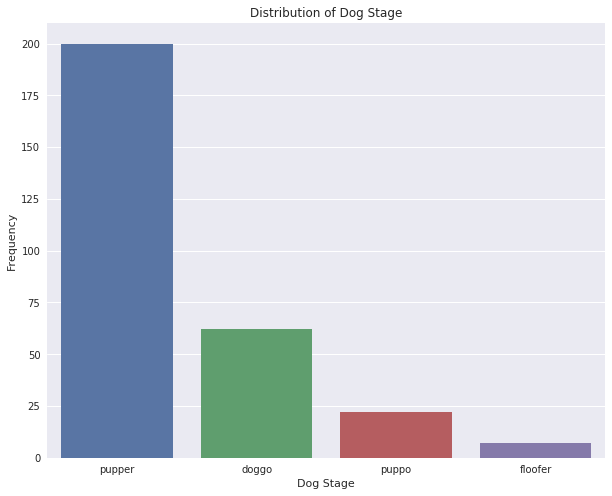

In [9]:
sns.set(rc={'figure.figsize':(10,8)})
x =clean_df.dog_stage.value_counts().index
y =clean_df.dog_stage.value_counts()
g = sns.barplot(x,y)
g.set(xlabel='Dog Stage', ylabel='Frequency',title="Distribution of Dog Stage");
g.legend()

The most common growth stage of dogs is pupper, followed by doggo, puppo, and floofer.Pupper means a tiny doggo so　it is presumed that people are interested in small dogs.

**Question3:** Is there a relationship between the number of reposts and the growth stage of the dog?

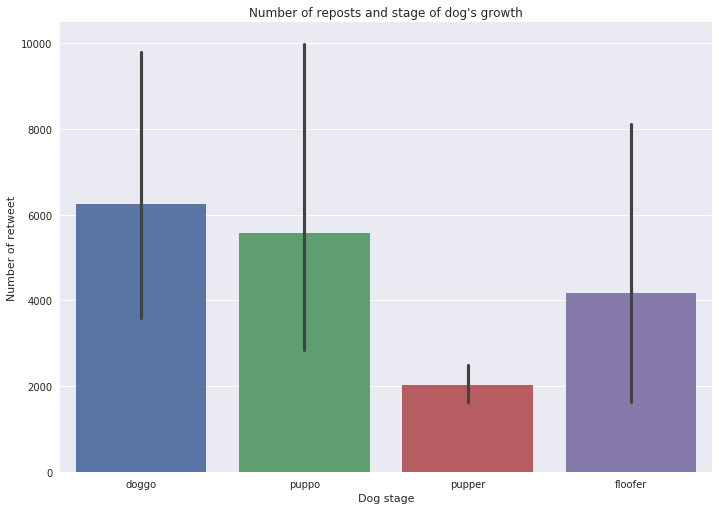

In [13]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
x =clean_df.dog_stage
y =clean_df.retweet_count
g = sns.barplot(x,y)
g.set(xlabel='Dog stage', ylabel='Number of retweet',title="Number of reposts and stage of dog's growth");
g.legend()

Comparing the number of resubmissions by dog growth stage, doggo and puppo have a similar distribution; flooler has fewer than those two, and pupper has considerably fewer than the other three.From the above, we can see that the trend is different between posts and re-posts.

**Question4:** Is there a relationship between the number of reposts and the number of favorite?

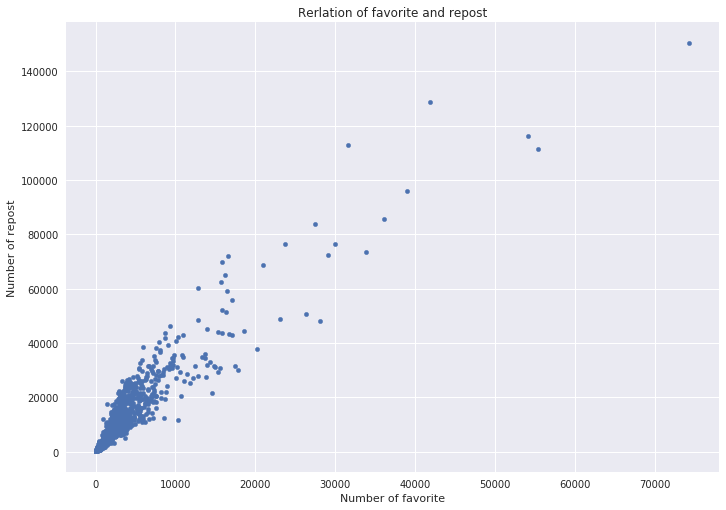

In [12]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
g=clean_df.plot(kind='scatter', x='retweet_count',y='favorite_count');
g.set(xlabel='Number of favorite', ylabel='Number of repost',title="Rerlation of favorite and repost");
g.legend()

Looking at the graph, I believe there is a positive correlation between favorite and the number of re-posts.